In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv('/Users/Rohan/Downloads/creditcard_2.csv')

In [8]:
print(dataset.columns)

Index(['Time', 'TID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
print(dataset.shape)

(284807, 32)


In [10]:
dataset = dataset.sample(frac = 0.1,random_state=1)

In [11]:
print(dataset.shape)

(28481, 32)


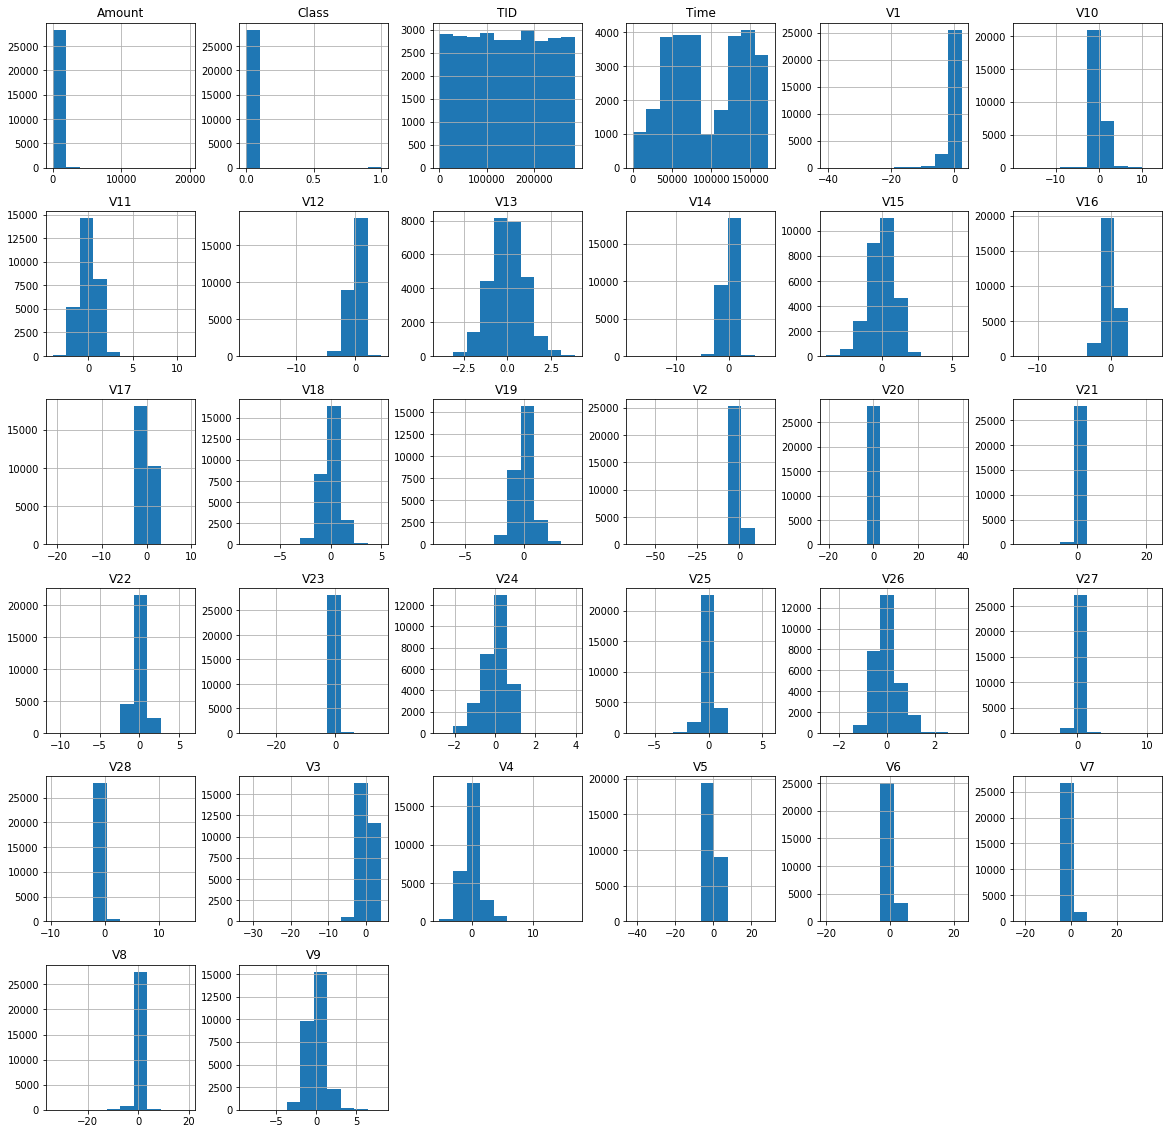

In [12]:
dataset.hist(figsize=(20,20))
plt.show()

In [13]:
Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]

In [14]:
outlier_fraction = len(Fraud)/float(len(Valid)) #fraud / valid

In [15]:
print(outlier_fraction)
print('Fraud Cases:',len(Fraud))
print('Valid Cases:',len(Valid))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


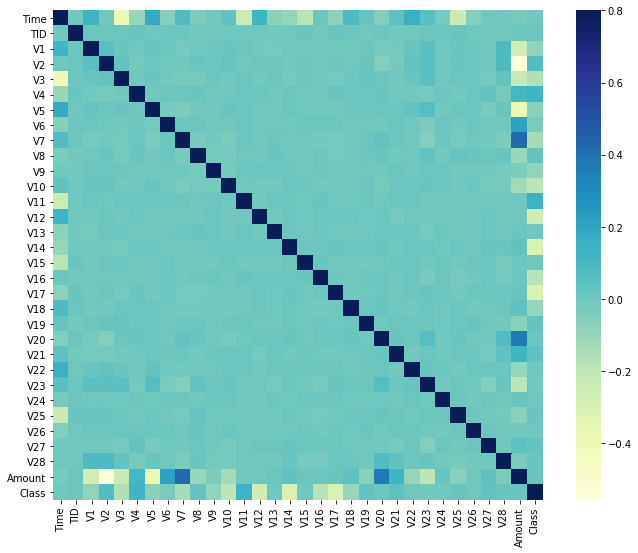

In [16]:
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True,cmap="YlGnBu")
plt.show()

In [17]:
columns = dataset.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

X = dataset[columns]
Y = dataset[target]

print(X.shape)
print(Y.shape)

(28481, 31)
(28481,)


In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state)}

In [12]:
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)
 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()

    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>